In [1]:
import pandas as pd
from yelp.client import Client
import requests
from bs4 import BeautifulSoup
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import nltk
from tqdm import tqdm
import regex as re
import heapq  

%matplotlib inline

In [2]:
# API_KEY = "cv-xXEAMYyEV3UEF-AcDxBCH5TgNXveK9Gs_Sh9xITWYM6ob_6zKQYSCJKRMndCT6Flckrsj99lg_7GqSmoDDRYIr-3S4Dqe7CmfuwhSY_UAiYIQC_CP2QgpE4DTW3Yx"

# client = Client(API_KEY)


In [7]:
reviews = []
url = "https://www.yelp.com/biz/ogliastro-brooklyn"
for i in range(1,20):
    result = requests.get(url)
    html = result.text
    soup = BeautifulSoup(html, "lxml")
    review_div = soup.find_all('div', {'class':'review-content'})
    for element in review_div:
        p = element.find('p')
        if p:
            reviews.append(p.text)
    url = "https://www.yelp.com/biz/ogliastro-brooklyn?start=" + str(len(reviews))

In [8]:
len(reviews)

165

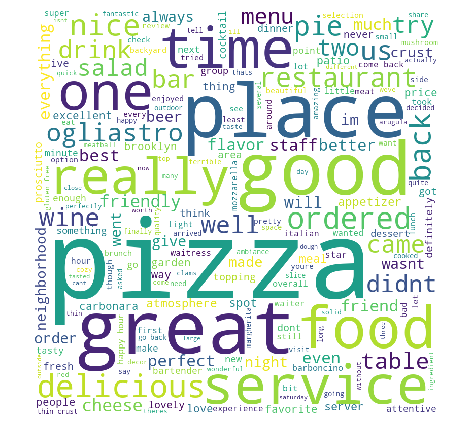

In [18]:
comment_words = ' '
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in reviews: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (6, 6), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

In [10]:
reviews = [i.lower() for i in reviews]
reviews = [re.sub("[^\w\s]", '', i) for i in reviews]
reviews = [i.replace("\xa0", '') for i in reviews]

In [11]:
reviews_tk = [nltk.tokenize.SpaceTokenizer().tokenize(i) for i in reviews]

In [12]:
stopwords = nltk.corpus.stopwords.words("english")

word_frequencies = {}

for review in reviews_tk:  
    for word in review:
        if word not in stopwords:
            if word not in word_frequencies.keys():
                word_frequencies[word] = 1
            else:
                word_frequencies[word] += 1

In [13]:
max_freq = max(word_frequencies.values())

for word in word_frequencies.keys():
    word_frequencies[word] = word_frequencies[word] / max_freq

In [14]:
word_frequencies

{'everything': 0.09777777777777778,
 'good': 0.4577777777777778,
 'hereespecially': 0.0044444444444444444,
 'pizza': 1.0,
 'really': 0.2088888888888889,
 'enjoyed': 0.04888888888888889,
 'polipo': 0.0044444444444444444,
 'octopus': 0.02666666666666667,
 'cooked': 0.044444444444444446,
 'perfectly': 0.04,
 'flavors': 0.05333333333333334,
 'else': 0.017777777777777778,
 'complimented': 0.0044444444444444444,
 'well': 0.13333333333333333,
 'carbonara': 0.07555555555555556,
 'polpette': 0.013333333333333334,
 'cant': 0.035555555555555556,
 'go': 0.13333333333333333,
 'wrong': 0.03111111111111111,
 'pizzas': 0.27555555555555555,
 'crust': 0.14222222222222222,
 'beautifully': 0.008888888888888889,
 'crispy': 0.03111111111111111,
 'perfect': 0.10222222222222223,
 'thickness': 0.0044444444444444444,
 'hold': 0.008888888888888889,
 'toppings': 0.05333333333333334,
 'comes': 0.008888888888888889,
 'cut': 0.008888888888888889,
 'cleanly': 0.008888888888888889,
 'slices': 0.035555555555555556,
 's

In [15]:
review_scores = {}  
for review in reviews:  
    for word in nltk.word_tokenize(review.lower()):
        if word in word_frequencies.keys():
            if len(review.split(' ')) < 75:
                if review not in review_scores.keys():
                    review_scores[review] = word_frequencies[word]
                else:
                    review_scores[review] += word_frequencies[word]

In [17]:
summary_reviews = heapq.nlargest(5, review_scores, key=review_scores.get)

summary = ', '.join(summary_reviews)  
print(summary)

great pizza great friendly service and a lovely garden nice wine list and good drinks definitely as good as frannys pizza id like to see some pasta dishes added to the menu decor is pretty cool im a regular and very happy to have them in my hood, went here and ate in the garden a few sundays ago it wasnt as good as i hoped it to be since it was a mere 4 blocks from my apartment it was good but not amazing for a fancier pizza spot it was also a bit overpriced for what it was the garden was great though i would go back just to sit back there and eat pizza and drink wine, the vibe here is great its a great new addition to to the neighborhood the pizza was delicious and theres a nice alcohol selection we had the mushroom pizza the prosciutto pizza and the margherita they were all delicious the crust was crispy but not burnt, i would never ordered the seafood pizza but im so glad my family did because it was amazing this place has great cozy atmosphere and is perfect for a bottle of wine an